In [1]:
from scipy.ndimage.measurements import label as bwlabel
from skimage.measure import regionprops
from pylab import *

import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
sns.set()
rcParams['figure.figsize'] = (12, 8)

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("poster")

In [3]:
def percolation_matrix(p, L):
    """Creates and returns a labeled percolation matrix, and the number of clusters."""
    prob_matrix = rand(L, L)
    perc_matrix = prob_matrix < p
    label_perc_matrix, n_clusters = bwlabel(perc_matrix)
    return label_perc_matrix, n_clusters

In [4]:
def find_ppie(search_area, L, x, simulations_per_p=100):
    Pie = zeros(len(search_area))
    
    for i, prob in enumerate(search_area):
        simulation_i = 0
        
        while simulations_per_p > simulation_i:
            lw, num = percolation_matrix(prob, L)
            cluster_infos = regionprops(lw, cache=False)
            bboxs = array([r.bbox for r in cluster_infos]).astype(int)
            
            spanning = False
            if len(bboxs) > 0:
                # indecies where Xmax - Xmin >= Lx
                jxs = argwhere(bboxs[:, 2] - bboxs[:, 0] >= L)
                # indecies where Ymax - Ymin >= Ly
                jys = argwhere(bboxs[:, 3] - bboxs[:, 1] >= L)
                js = unique(vstack((jxs, jys)))
                
                if len(js) > 0:
                    Pie[i] += 1
            simulation_i += 1
            
    Pie[:] /= simulations_per_p
    closest_value = argmin(abs(Pie - x))
    error = (Pie - x)[closest_value]
    ppiex = search_area[closest_value]
    
    return ppiex, Pie, error

search_area = array([0.5 + 0.001*i for i in range(100)])
L = 100
x = 0.3

print(search_area)
ppiex, Pie, error = find_ppie(search_area, L, x)
print(Pie)
print("ppiex computed with a error: {}".format(error))

[0.5   0.501 0.502 0.503 0.504 0.505 0.506 0.507 0.508 0.509 0.51  0.511
 0.512 0.513 0.514 0.515 0.516 0.517 0.518 0.519 0.52  0.521 0.522 0.523
 0.524 0.525 0.526 0.527 0.528 0.529 0.53  0.531 0.532 0.533 0.534 0.535
 0.536 0.537 0.538 0.539 0.54  0.541 0.542 0.543 0.544 0.545 0.546 0.547
 0.548 0.549 0.55  0.551 0.552 0.553 0.554 0.555 0.556 0.557 0.558 0.559
 0.56  0.561 0.562 0.563 0.564 0.565 0.566 0.567 0.568 0.569 0.57  0.571
 0.572 0.573 0.574 0.575 0.576 0.577 0.578 0.579 0.58  0.581 0.582 0.583
 0.584 0.585 0.586 0.587 0.588 0.589 0.59  0.591 0.592 0.593 0.594 0.595
 0.596 0.597 0.598 0.599]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.
 0.   0.   0.   0.   0.01 0.   0.01 0.   0.03 0.   0.04 0.03 0.01 0.02
 0.08 0.03 0.02 0.01 0.05 0.08 0.05 0.07 0.09 0.09 0.09 0.09 0.06 0.15
 0.16 0.15 0.19 0.2  0.21 0.25 0.28 0.24 

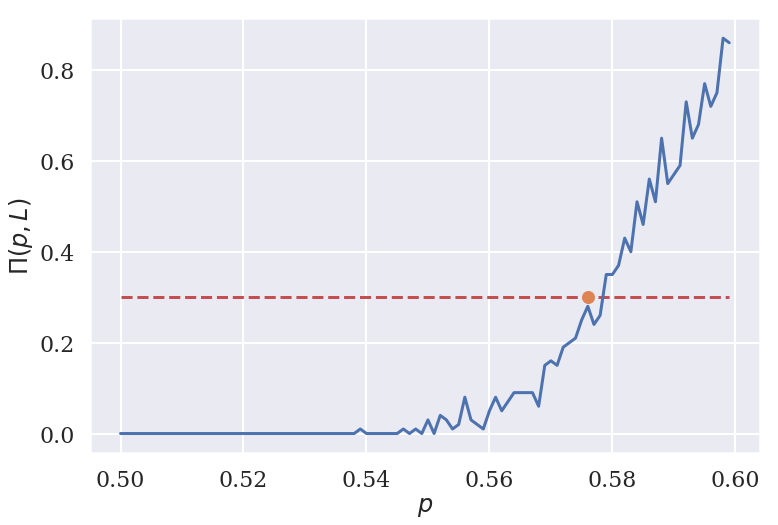

In [14]:
plot(search_area, Pie)
plot([ppiex], [x], 'o')
hlines(x, search_area[0], search_area[-1], 'r', '--')
xlabel(r"$p$")
ylabel(r"$\Pi (p, L)$")
show()

In [19]:
Ls = [50, 100, 200, 400, 800]
xs = [0.3, 0.8]

for x in xs:
    for L in Ls:
        ppiex, Pie, error = find_ppie(search_area, L, x)
        print("ppiex = {}, L = {}, x = {}, with error {:.8g} for MCC = 100".format(ppiex, L, x, error))

ppiex = 0.563, L = 50, x = 0.3, with error 0.01 for MCC = 100
ppiex = 0.577, L = 100, x = 0.3, with error -0.04 for MCC = 100
ppiex = 0.583, L = 200, x = 0.3, with error -0.01 for MCC = 100


KeyboardInterrupt: 